Data Exploration of tandem data

About Dataset: 
Trip Duration (seconds), 
Start Time and Date, 
End Time and Date,
Start Station ID, 
Start Station Name, 
Start Station Latitude, 
Start Station Longitude, 
End Station ID, 
End Station Name, 
End Station Latitude, 
End Station Longitude, 
Bike ID,
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual),
Member Year of Birth, 
Member Gender

a. Read the entire dataset using pandas dataframe and build the file by appending each file in an optimized manner

b. What was the time duration for the average trip taken? (Use plotting techniques and write your observations for the same.)

c. Is there any correlation between the months and the trip duration? Use scatter plot and comment your observations from the plot

d. Do seasons affect the duration of a trip ? Comment your observations.

e. Using multivariate exploration, explain whether there is any relation between short trips and the users.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

a. Read the entire dataset using pandas dataframe and build the file by appending each file in an optimized manner

In [2]:
df1 = pd.read_csv('201803-fordgobike-tripdata.csv')
df1

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,6,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78,Folsom St at 9th St,37.773717,-122.411647,47,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258,University Ave at Oxford St,37.872355,-122.266447,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186,Lakeside Dr at 14th St,37.801319,-122.262642,340,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111377,471,2018-03-01 00:28:29.1730,2018-03-01 00:36:20.9280,180,Telegraph Ave at 23rd St,37.812678,-122.268773,202,Washington St at 8th St,37.800754,-122.274894,269,Subscriber,1970.0,Male,Yes
111378,285,2018-03-01 00:17:32.9500,2018-03-01 00:22:18.1560,183,Telegraph Ave at 19th St,37.808702,-122.269927,195,Bay Pl at Vernon St,37.812314,-122.260779,302,Subscriber,1971.0,Male,No
111379,408,2018-03-01 00:13:37.1640,2018-03-01 00:20:25.6830,27,Beale St at Harrison St,37.788059,-122.391865,11,Davis St at Jackson St,37.797280,-122.398436,1060,Customer,1998.0,Male,No
111380,368,2018-03-01 00:14:14.4590,2018-03-01 00:20:22.5140,27,Beale St at Harrison St,37.788059,-122.391865,11,Davis St at Jackson St,37.797280,-122.398436,3040,Customer,1996.0,Male,No


In [3]:
df2 = pd.read_csv('201807-fordgobike-tripdata.csv')
df2

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59989,2018-07-31 18:20:32.7230,2018-08-01 11:00:22.1890,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,181.0,Grand Ave at Webster St,37.811377,-122.265192,1953,Customer,1995.0,Male,No
1,60232,2018-07-31 17:24:26.2350,2018-08-01 10:08:18.7520,77.0,11th St at Natoma St,37.773507,-122.416040,356.0,Valencia St at Clinton Park,37.769188,-122.422285,3010,Subscriber,1994.0,Female,No
2,43864,2018-07-31 21:03:26.7030,2018-08-01 09:14:30.8340,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.410000,-121.940000,4273,Subscriber,1998.0,Male,No
3,51522,2018-07-31 18:54:23.7210,2018-08-01 09:13:06.6610,114.0,Rhode Island St at 17th St,37.764478,-122.402570,345.0,Hubbell St at 16th St,37.766474,-122.398295,1043,Subscriber,1990.0,Female,No
4,83380,2018-07-31 09:22:29.1000,2018-08-01 08:32:09.2700,213.0,32nd St at Adeline St,37.823847,-122.281193,198.0,Snow Park,37.807813,-122.264496,1336,Subscriber,1982.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199217,130,2018-07-01 00:07:39.5680,2018-07-01 00:09:49.9220,253.0,Haste St at College Ave,37.866418,-122.253799,267.0,Derby St at College Ave,37.861804,-122.253569,1874,Subscriber,1997.0,Female,No
199218,445,2018-07-01 00:02:16.5890,2018-07-01 00:09:42.0840,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,214.0,Market St at Brockhurst St,37.823321,-122.275733,3134,Subscriber,1992.0,Other,No
199219,490,2018-07-01 00:00:41.6330,2018-07-01 00:08:51.6770,307.0,SAP Center,37.332692,-121.900084,208.0,S. 4th St at San Carlos St,37.330040,-121.881821,2700,Subscriber,1997.0,Female,No
199220,219,2018-07-01 00:04:32.9560,2018-07-01 00:08:12.3040,70.0,Central Ave at Fell St,37.773311,-122.444293,52.0,McAllister St at Baker St,37.777416,-122.441838,3848,Customer,1979.0,Male,No


In [4]:
df3 = pd.read_csv('201811-fordgobike-tripdata.csv')
df3

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.420000,-121.940000,NaN,NaN,37.410000,-121.940000,4105,Customer,1982.0,Female,No
1,42847,2018-11-30 20:13:45.5090,2018-12-01 08:07:53.1330,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,1992.0,Male,No
2,1128,2018-11-30 23:58:26.4310,2018-12-01 00:17:14.4880,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,1998.0,Male,Yes
3,2476,2018-11-30 23:35:06.7230,2018-12-01 00:16:23.4740,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,1959.0,Male,No
4,1273,2018-11-30 23:54:12.3890,2018-12-01 00:15:26.3680,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,1993.0,Female,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134130,197,2018-11-01 00:06:57.8440,2018-11-01 00:10:15.1550,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,76.0,McCoppin St at Valencia St,37.771662,-122.422423,1860,Subscriber,1970.0,Male,Yes
134131,267,2018-11-01 00:05:22.5160,2018-11-01 00:09:49.9650,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,215.0,34th St at Telegraph Ave,37.822547,-122.266318,3028,Subscriber,1977.0,Male,No
134132,317,2018-11-01 00:04:20.9370,2018-11-01 00:09:38.7410,368.0,Myrtle St at Polk St,37.785434,-122.419622,61.0,Howard St at 8th St,37.776513,-122.411306,3139,Subscriber,1990.0,Male,No
134133,371,2018-11-01 00:03:04.8480,2018-11-01 00:09:16.1500,368.0,Myrtle St at Polk St,37.785434,-122.419622,77.0,11th St at Natoma St,37.773507,-122.416040,1321,Subscriber,1991.0,Male,No


In [5]:
df4 = pd.read_csv('201812-fordgobike-tripdata.csv')
df4

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No
1,63587,2018-12-31 19:00:32.1210,2019-01-01 12:40:19.3660,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4281,Customer,1995.0,Male,No
2,64169,2018-12-31 15:09:01.0820,2019-01-01 08:58:30.0910,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4267,Customer,1988.0,Male,No
3,30550,2018-12-31 19:26:20.7750,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes
4,2150,2018-12-31 23:59:12.0970,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,4820,Customer,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131358,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No
131359,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No
131360,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No
131361,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No


In [16]:
df = pd.concat([df1,df2,df3,df4], ignore_index = True, axis = 0)
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576097,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No
576098,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No
576099,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No
576100,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576102 entries, 0 to 576101
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             576102 non-null  int64  
 1   start_time               576102 non-null  object 
 2   end_time                 576102 non-null  object 
 3   start_station_id         572242 non-null  float64
 4   start_station_name       572242 non-null  object 
 5   start_station_latitude   576102 non-null  float64
 6   start_station_longitude  576102 non-null  float64
 7   end_station_id           572242 non-null  float64
 8   end_station_name         572242 non-null  object 
 9   end_station_latitude     576102 non-null  float64
 10  end_station_longitude    576102 non-null  float64
 11  bike_id                  576102 non-null  int64  
 12  user_type                576102 non-null  object 
 13  member_birth_year        544529 non-null  float64
 14  memb

In [19]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [20]:
avg_duration = df['duration_sec'].mean()
print("Duration of trip in seconds:",avg_duration)

Duration of trip in seconds: 834.4304272507298


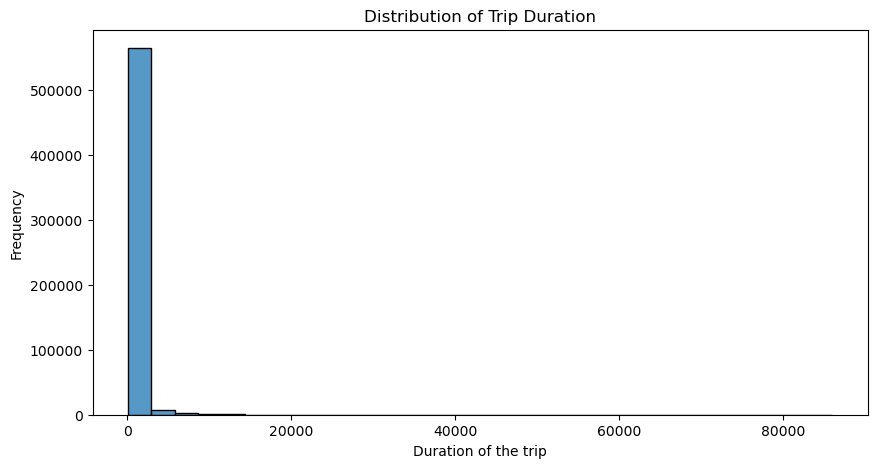

In [22]:
plt.figure(figsize = (10,5))
sns.histplot(df['duration_sec'], bins = 30)
plt.xlabel('Duration of the trip')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()

c. Is there any correlation between the months and the trip duration? Use scatter plot and comment your observations from the plot

In [24]:
df['month'] = df['start_time'].dt.month
correlation = df[['month', 'duration_sec']].corr()

print(f"Correlation between the months and the trip duration: {correlation.iloc[0,1]}")

Correlation between the months and the trip duration: -0.02359531473747954


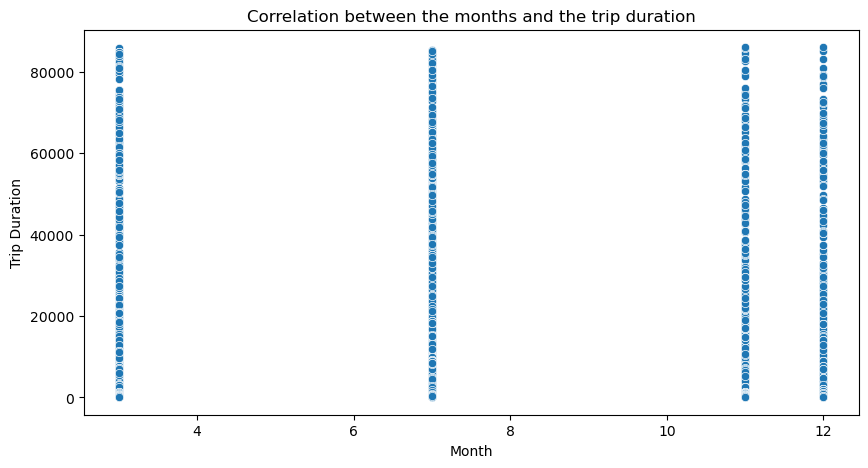

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'month', y = 'duration_sec', data = df)
plt.xlabel('Month')
plt.ylabel('Trip Duration')
plt.title('Correlation between the months and the trip duration')
plt.show()

d. Do seasons affect the duration of a trip ? Comment your observations.

In [32]:
def myseason(month):
    if month>=3 and month<6 :
        return 'Summer'
    elif month >=6 and month<9:
        return 'Monsoon'
    elif month>=9 and month<=12:
        return 'Winter'
    else:
        return 'Spring'

df['season'] = df['month'].apply(myseason)
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,trip type,trip_type,season
0,71766,2018-03-31 16:58:33.149,2018-04-01 12:54:39.263,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No,3,Long,Long,Summer
1,62569,2018-03-31 19:03:35.916,2018-04-01 12:26:25.035,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No,3,Long,Long,Summer
2,56221,2018-03-31 20:13:13.564,2018-04-01 11:50:14.840,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No,3,Long,Long,Summer
3,85844,2018-03-31 11:28:07.658,2018-04-01 11:18:52.613,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No,3,Long,Long,Summer
4,1566,2018-03-31 23:37:56.640,2018-04-01 00:04:02.893,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No,3,Long,Long,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576097,473,2018-12-01 00:11:54.811,2018-12-01 00:19:48.547,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No,12,Short,Short,Winter
576098,841,2018-12-01 00:02:48.726,2018-12-01 00:16:49.766,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No,12,Short,Short,Winter
576099,260,2018-12-01 00:05:27.615,2018-12-01 00:09:47.956,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No,12,Short,Short,Winter
576100,292,2018-12-01 00:03:06.549,2018-12-01 00:07:59.080,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No,12,Short,Short,Winter


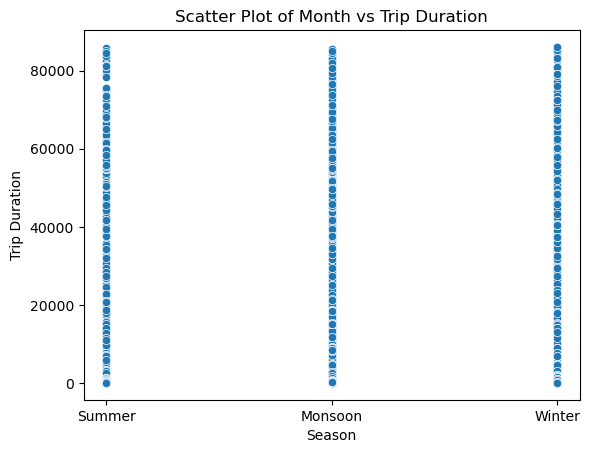

In [33]:
sns.scatterplot(data = df, x = df['season'], y = df['duration_sec'])
plt.xlabel("Season")
plt.ylabel("Trip Duration")
plt.title("Scatter Plot of Month vs Trip Duration")
plt.show()

e. Using multivariate exploration, explain whether there is any relation between short trips and the users.

In [34]:
df['trip_type'] = df['duration_sec'].apply(lambda x: 'Short' if x <= 900 else 'Long')
relation = df.groupby(['trip_type', 'user_type'])['bike_id'].count().unstack()
print("Relation:",relation)

Relation: user_type  Customer  Subscriber
trip_type                      
Long          43796       88281
Short         38809      405216


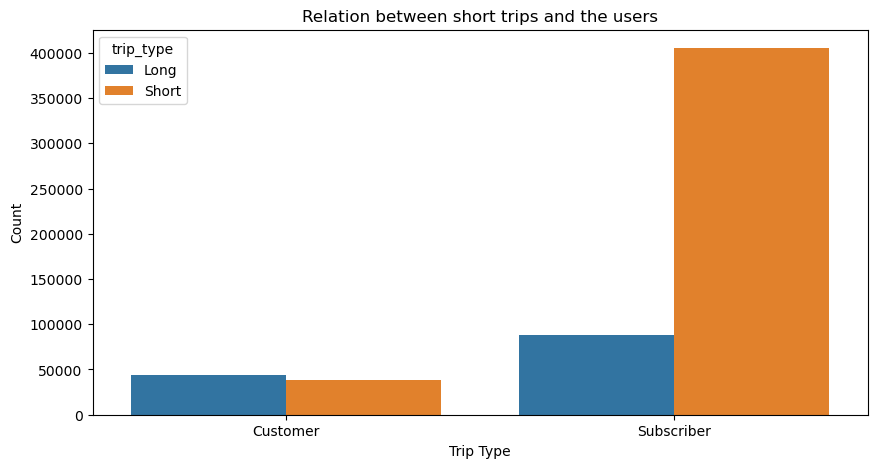

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'user_type', hue = 'trip_type', data = df)
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.title('Relation between short trips and the users')
plt.show()